# Credit Card Default Prediction

This project aims to predict whether a credit card customer will default on their payment next month using machine learning models.


## Problem Statement

Credit card default is a major financial risk. This project develops predictive models to identify customers likely to default, helping financial institutions reduce losses.


In [35]:
from google.colab import files
uploaded = files.upload()



Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Description

The dataset contains 30,000 customer records and 25 features including demographic details, credit limits, bill statements, and payment history.

Target Variable:
default.payment.next.month


In [10]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data Preprocessing

Data preprocessing involves checking missing values, understanding data types, and preparing the dataset for modeling.


In [11]:
df.shape


(30000, 25)

In [12]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [14]:
df.isnull().sum()


,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [15]:
df.fillna(df.mean(), inplace=True)


## Exploratory Data Analysis (EDA)

EDA is performed to analyze patterns and relationships between variables using visualizations such as count plots and heatmaps.


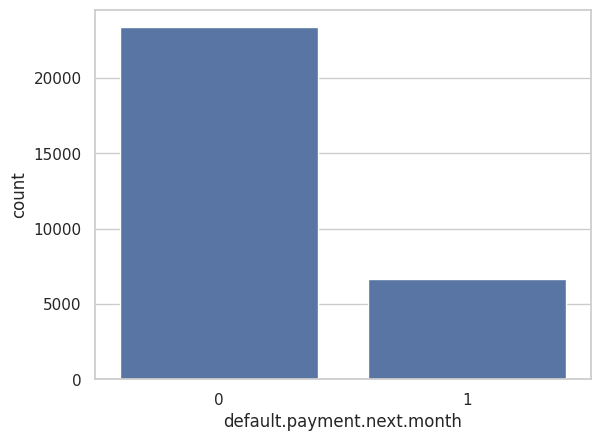

In [16]:
sns.countplot(x='default.payment.next.month', data=df)
plt.show()


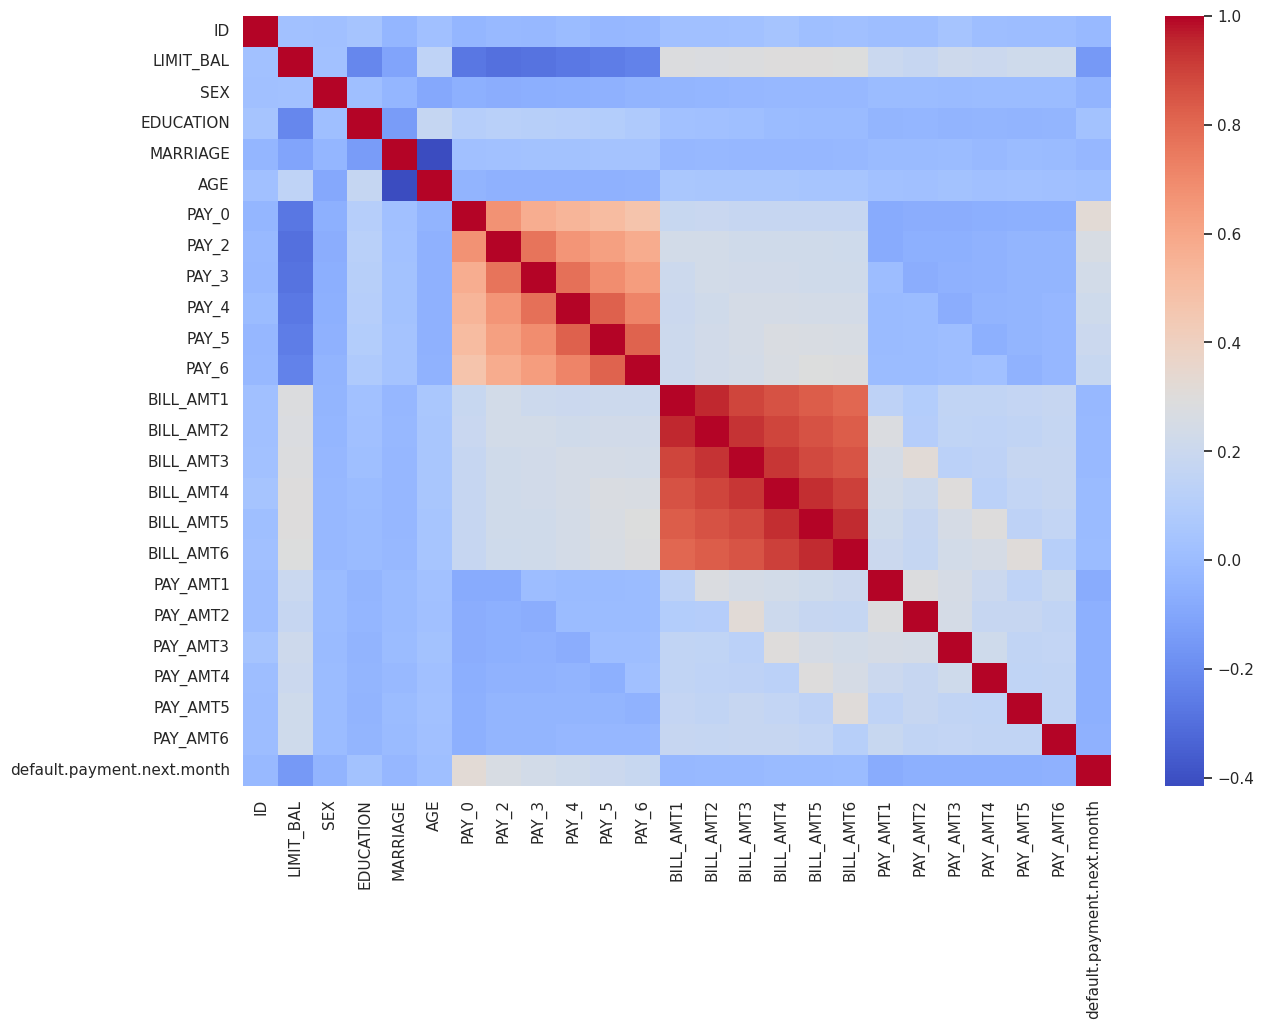

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


## Feature Selection

Independent variables (X) and target variable (y) are separated for model training.


In [18]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## Logistic Regression Model

Logistic Regression is used as the baseline classification model to predict default risk.


In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [21]:
y_pred_lr = lr.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.8023333333333333
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4687
           1       0.66      0.20      0.30      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.58      0.59      6000
weighted avg       0.78      0.80      0.76      6000



## Random Forest Classifier

Random Forest is an ensemble machine learning algorithm that improves prediction accuracy by combining multiple decision trees.


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [24]:
y_pred_rf = rf.predict(X_test)


In [25]:
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))


RF Accuracy: 0.8183333333333334


## Model Evaluation

Random Forest achieved an accuracy of 81.83%, outperforming Logistic Regression.


In [26]:
from sklearn.metrics import roc_auc_score

y_prob = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)


np.float64(0.7614038668313501)

ROC-AUC score of 0.76 indicates good classification performance in distinguishing defaulters from non-defaulters.


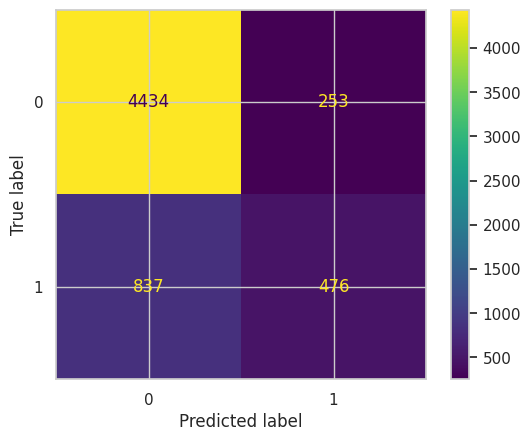

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## Feature Importance Analysis

Feature importance helps identify which variables contribute most to prediction.


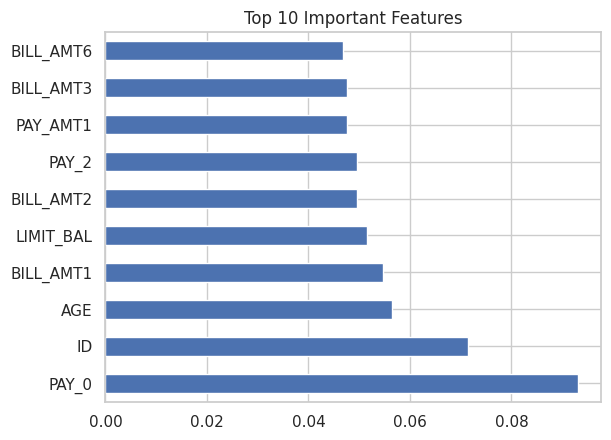

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features)
feat_imp.nlargest(10).plot(kind='barh')

plt.title("Top 10 Important Features")
plt.show()


In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_tuned = RandomizedSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=3,
    n_iter=5
)

rf_tuned.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [31]:
best_rf = rf_tuned.best_estimator_

y_pred_best = best_rf.predict(X_test)

accuracy_score(y_test, y_pred_best)


0.8213333333333334

In [32]:
import joblib

joblib.dump(best_rf, "credit_default_model.pkl")


['credit_default_model.pkl']

In [33]:
from google.colab import files
files.download("credit_default_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

This project successfully implemented machine learning models to predict credit card default risk.

Random Forest performed best with 81.83% accuracy and ROC-AUC of 0.76. Such predictive models can assist financial institutions in minimizing credit risk.
